In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from IPython.display import display,Markdown,HTML
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/HR%20Employee%20Attrition/HR-Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
df.duplicated().sum()

0

In [19]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
df['Attrition'] = df['Attrition'].map({"No":0, "Yes":1})
text_negative = "Negative"
text_positive = "Positive"
target_column = "Attrition"

df_all = df.copy()

df_positive = df[df[target_column]==1]

df_negative = df[df[target_column]==0]
def plot_pie(column, title="All Group/Class"):
    fig,axs = plt.subplots(1,1)
    data = df_all[column].value_counts()
    plt.pie(data,autopct='%1.2f%%',labels=data.index)
    plt.title(title)
    plt.show()
    
def plot_hist(column, title="All Group/Class"):
    plt.hist(df_all[column],density=True)
    plt.title(title)
    plt.show()

def plot_bar(column, sort=False, title="All Group/Class"):
    if sort:
        data_all = df_all[column].value_counts().sort_index()
    else:
        data_all = df_all[column].value_counts()
    plt.bar(data_all.index.astype(str),data_all)
    plt.title(title)
    plt.show()
    
def plot_bar_compare(column, sort=False):
    if sort:
        data_positive = df_positive[column].value_counts().sort_index()
        data_negative = df_negative[column].value_counts().sort_index()
    else:
        data_positive = df_positive[column].value_counts()
        data_negative = df_negative[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].bar(data_negative.index.astype(str),data_negative)
    axs[0].title.set_text(text_negative)
    axs[1].bar(data_positive.index.astype(str),data_positive)
    axs[1].title.set_text(text_positive)
    plt.show()

def plot_hist_compare(column, bins=5):
    plt.hist([df_negative[column], df_positive[column]] , color=['c','r'])
    plt.legend((text_negative, text_positive))
    plt.show()
    
def plot_pie_compare(column):
    data_positive = df_positive[column].value_counts()
    data_negative = df_negative[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].pie(data_negative,autopct='%1.2f%%',labels=data_negative.index)
    axs[0].title.set_text(text_negative)
    axs[1].pie(data_positive,autopct='%1.2f%%',labels=data_positive.index)
    axs[1].title.set_text(text_positive)
    plt.show()

def plot_boxplot(column, title=""):
    ax = sns.boxplot(x=target_column, y=column, palette=["c", "r"],
            hue=target_column,  data=df_all).set_title(title, fontsize=15)
    plt.show()

def check_median(column):
    data_negative = df_negative[column].describe()
    data_positive = df_positive[column].describe()
    print("Median:")
    print('{}: {}'.format(text_negative,data_negative['50%']))
    print('{}: {}'.format(text_positive,data_positive['50%']))

def check_most(column):
    data_negative = df_negative[column].value_counts()
    data_positive = df_positive[column].value_counts()
    print("Most:")
    print('{}: {}'.format(text_negative,data_negative.index[0]))
    print('{}: {}'.format(text_positive,data_positive.index[0]))
def eda(df_all):
    display(HTML('<h1>Exploratory Data Analysis<h1>'))
    
    for column in df_all.columns:
        if column == target_column:
            continue
        display(HTML('<h2>{}<h2>'.format(column)))
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            if len(df[column].unique())>10 :
                plot_boxplot(column)
                check_median(column)
            else:
                plot_bar(column)
                plot_pie(column)
                plot_pie_compare(column)
                check_most(column)
        elif df[column].dtype == 'object':
            if len(df[column].unique())>10 :
                df[column].value_counts().head(5)
                df_negative[column].value_counts().head(5)
                df_positive[column].value_counts().head(5)
            else:
                plot_bar(column)
                plot_pie(column)
                plot_pie_compare(column)
                check_most(column)
        else:
            None

In [21]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

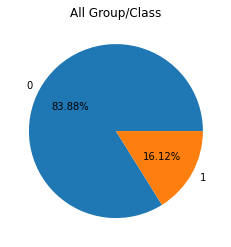

In [22]:
plot_pie("Attrition")

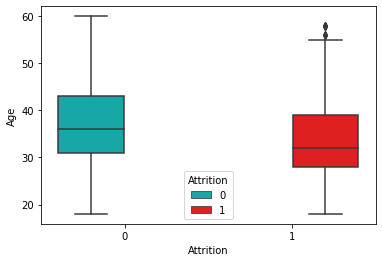

Median:
Negative: 36.0
Positive: 32.0


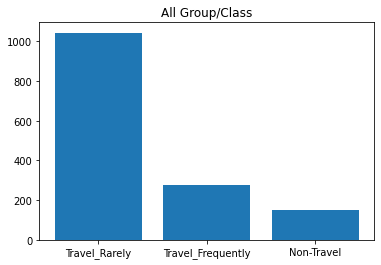

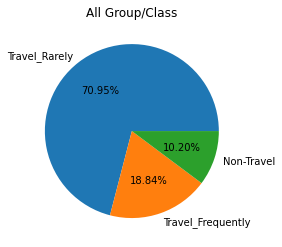

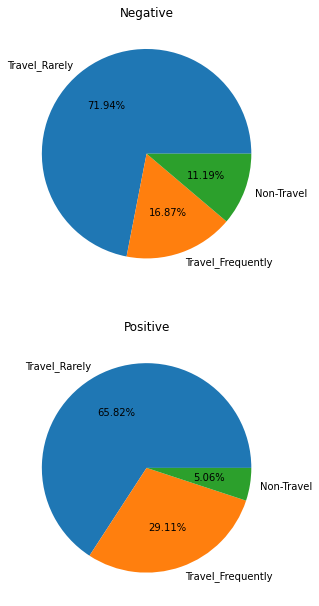

Most:
Negative: Travel_Rarely
Positive: Travel_Rarely


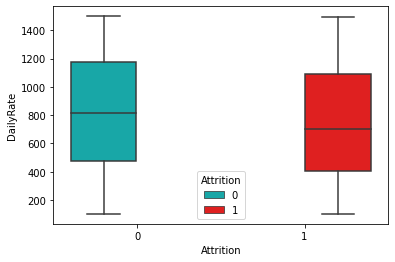

Median:
Negative: 817.0
Positive: 699.0


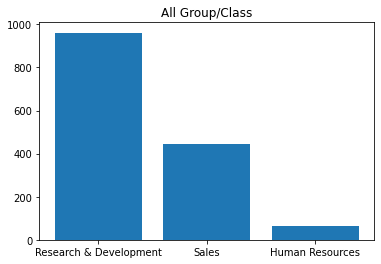

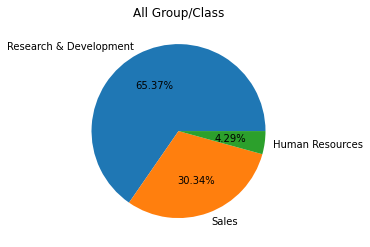

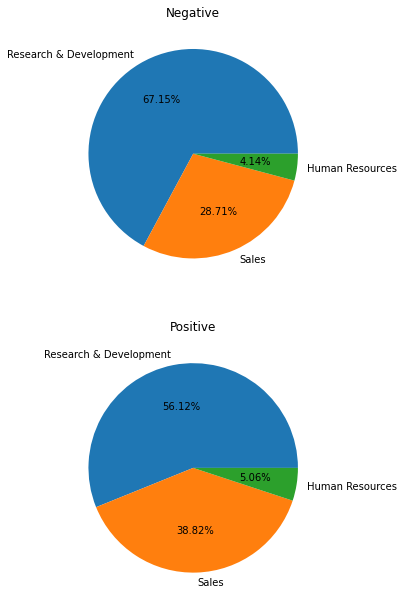

Most:
Negative: Research & Development
Positive: Research & Development


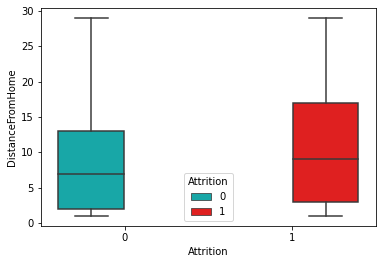

Median:
Negative: 7.0
Positive: 9.0


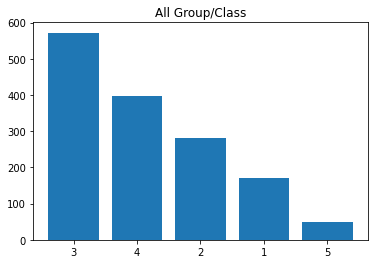

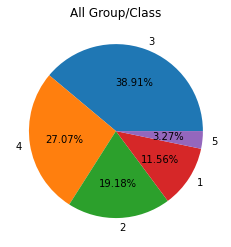

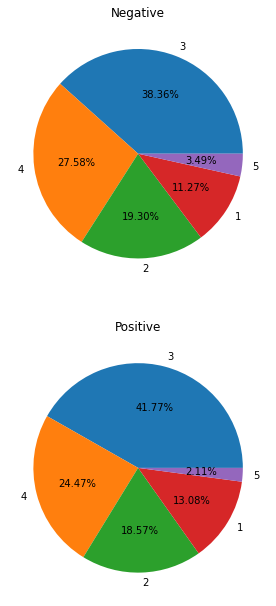

Most:
Negative: 3
Positive: 3


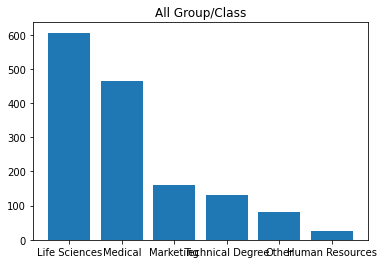

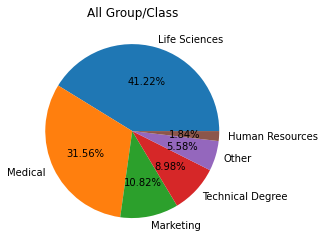

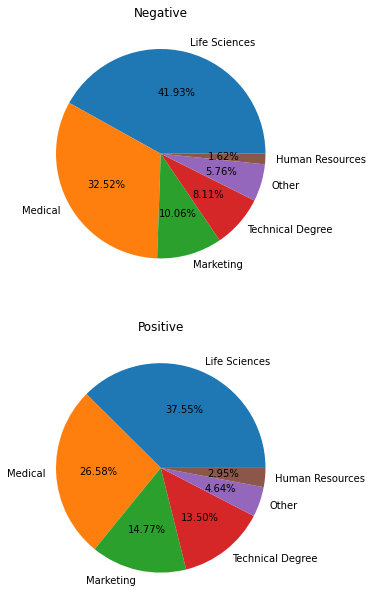

Most:
Negative: Life Sciences
Positive: Life Sciences


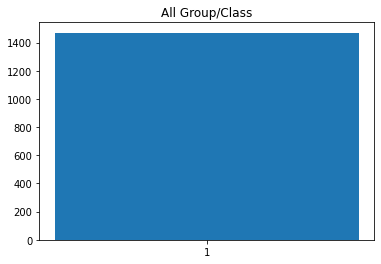

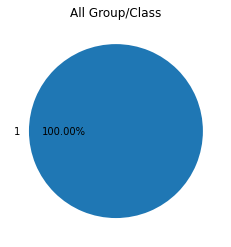

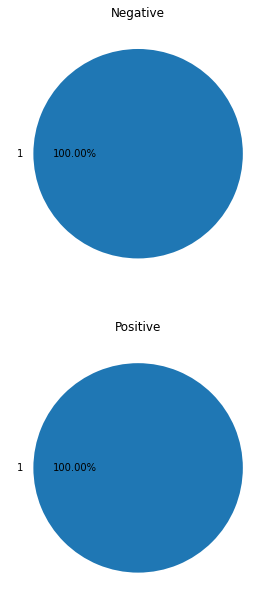

Most:
Negative: 1
Positive: 1


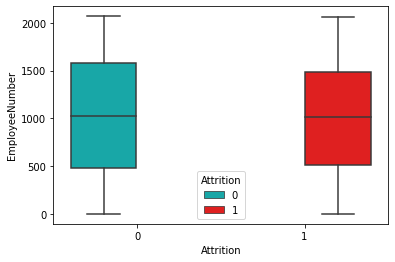

Median:
Negative: 1022.0
Positive: 1017.0


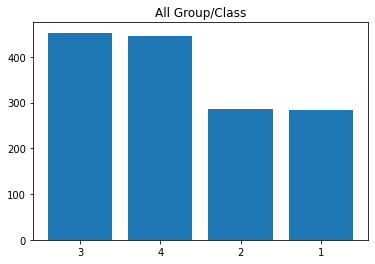

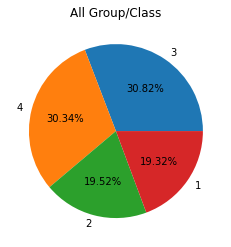

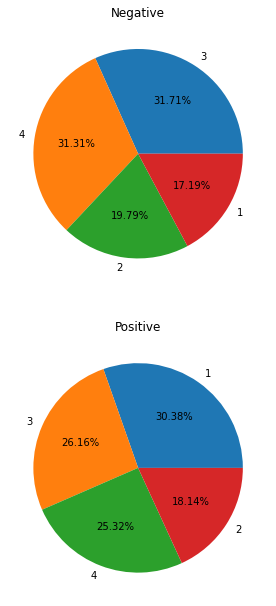

Most:
Negative: 3
Positive: 1


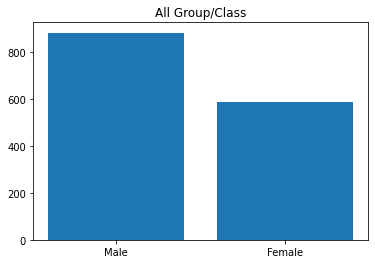

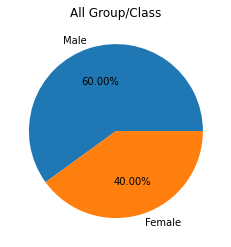

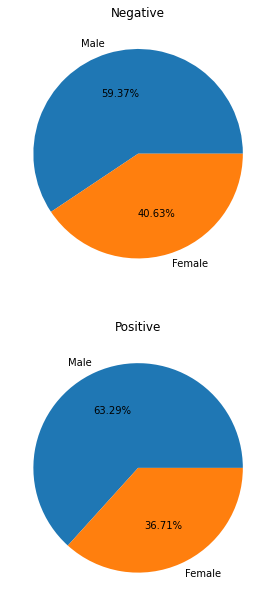

Most:
Negative: Male
Positive: Male


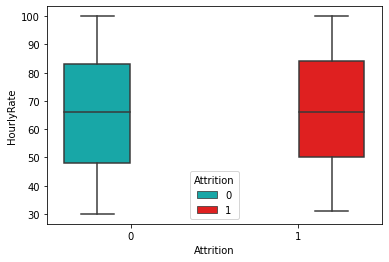

Median:
Negative: 66.0
Positive: 66.0


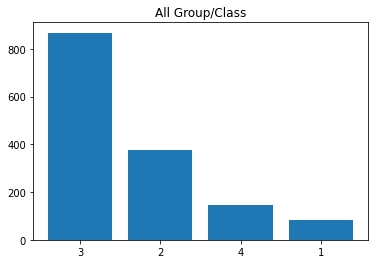

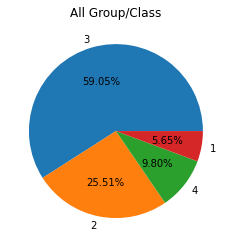

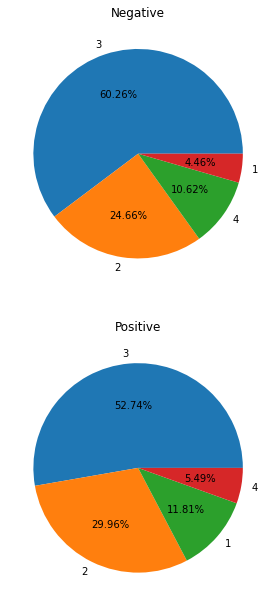

Most:
Negative: 3
Positive: 3


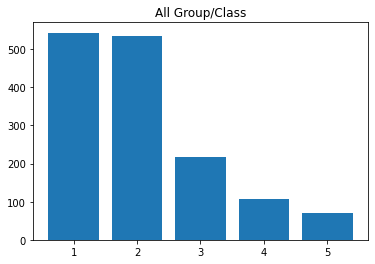

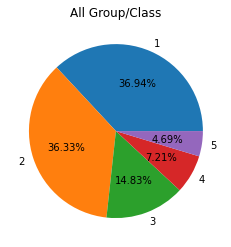

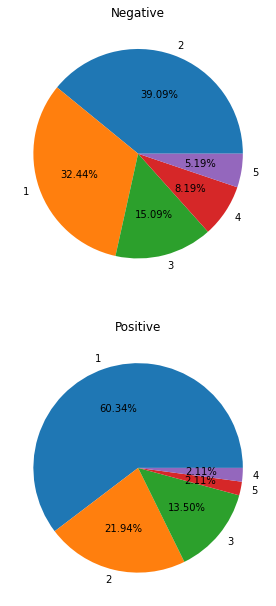

Most:
Negative: 2
Positive: 1


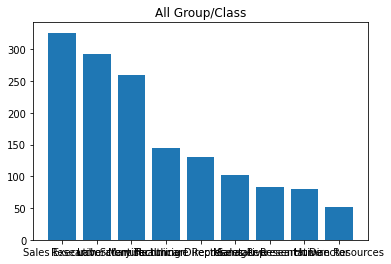

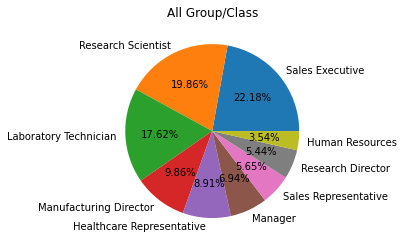

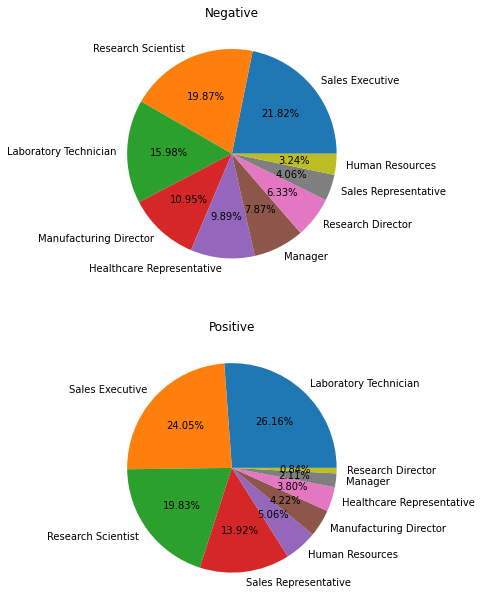

Most:
Negative: Sales Executive
Positive: Laboratory Technician


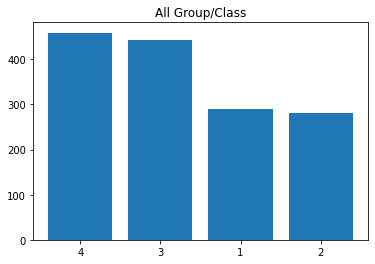

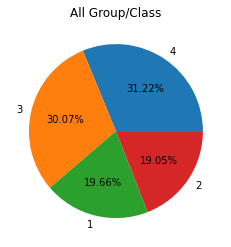

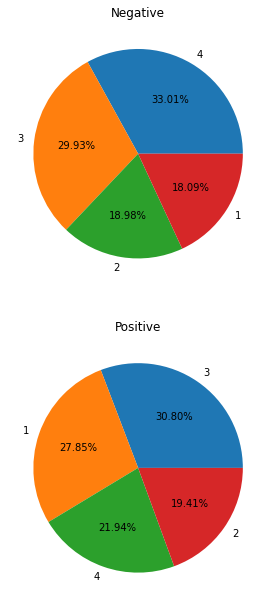

Most:
Negative: 4
Positive: 3


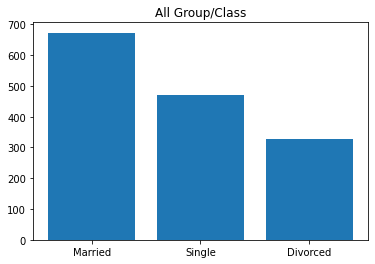

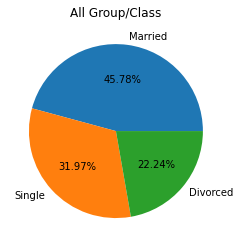

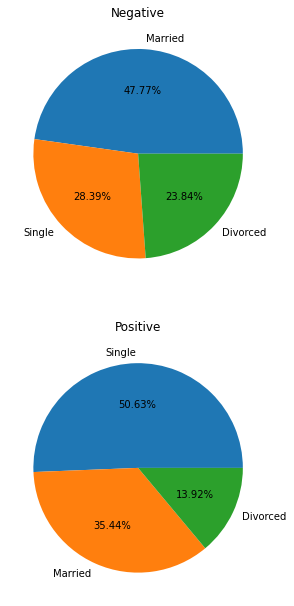

Most:
Negative: Married
Positive: Single


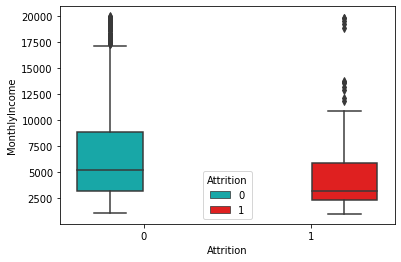

Median:
Negative: 5204.0
Positive: 3202.0


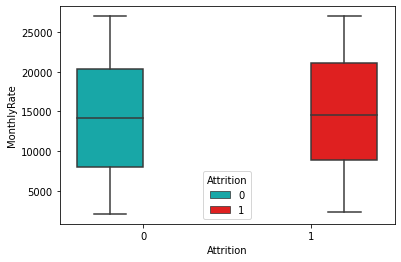

Median:
Negative: 14120.0
Positive: 14618.0


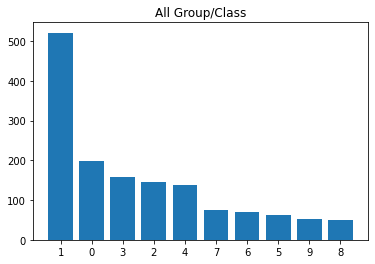

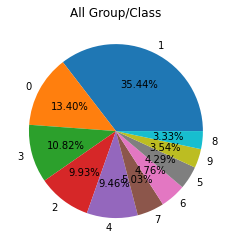

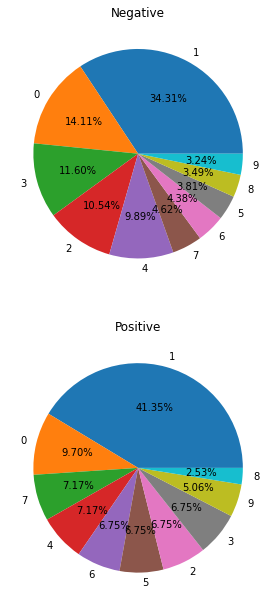

Most:
Negative: 1
Positive: 1


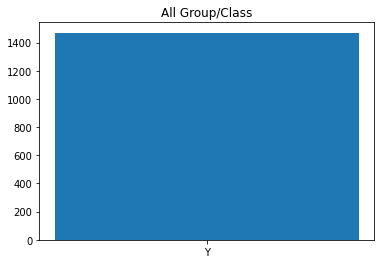

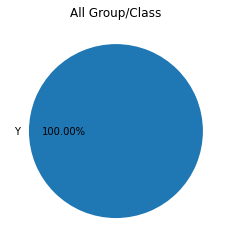

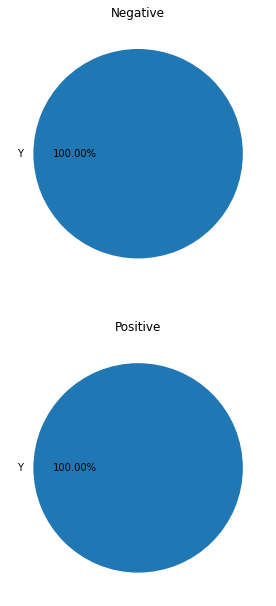

Most:
Negative: Y
Positive: Y


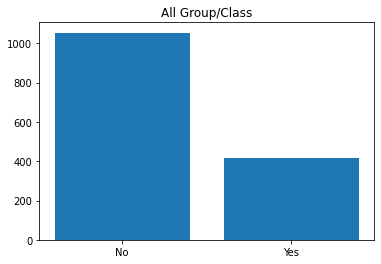

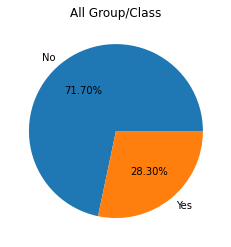

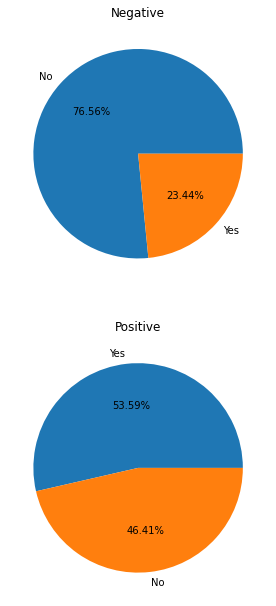

Most:
Negative: No
Positive: Yes


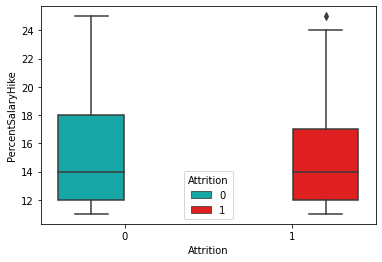

Median:
Negative: 14.0
Positive: 14.0


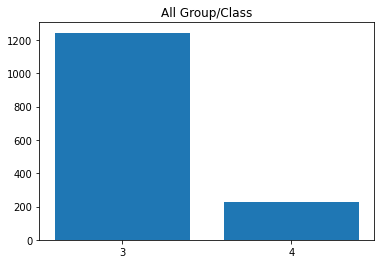

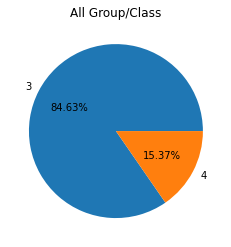

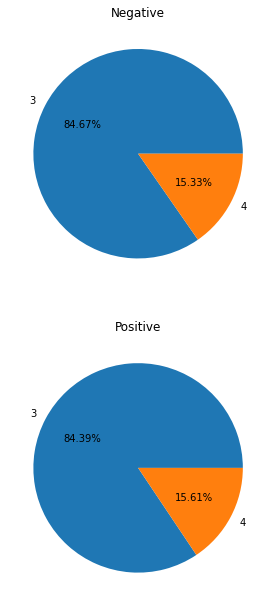

Most:
Negative: 3
Positive: 3


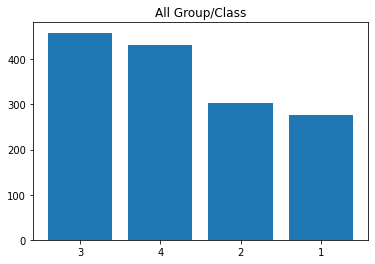

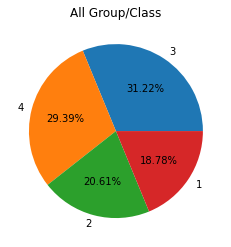

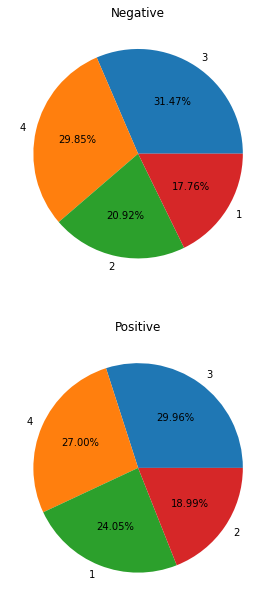

Most:
Negative: 3
Positive: 3


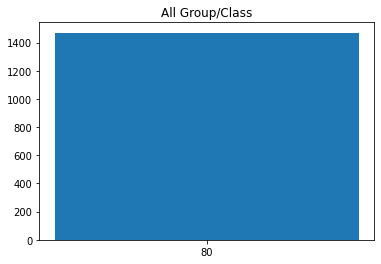

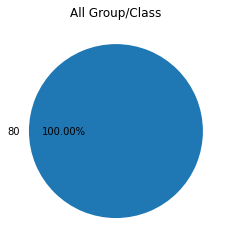

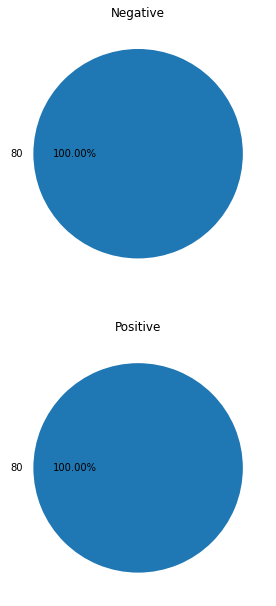

Most:
Negative: 80
Positive: 80


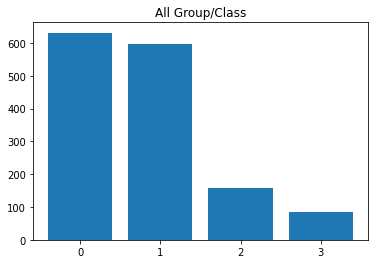

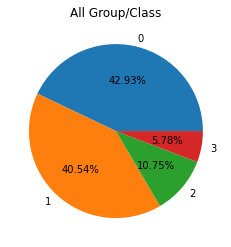

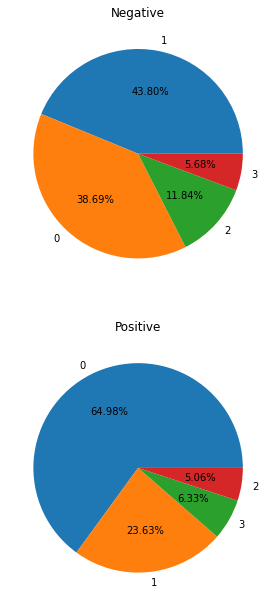

Most:
Negative: 1
Positive: 0


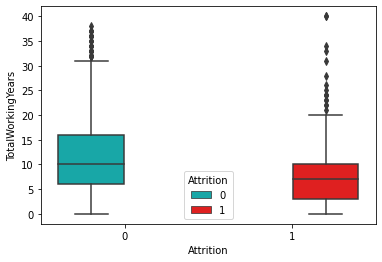

Median:
Negative: 10.0
Positive: 7.0


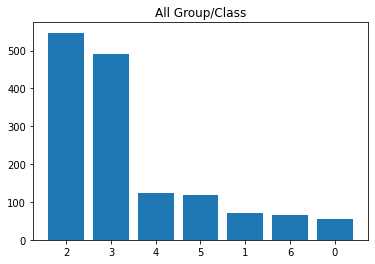

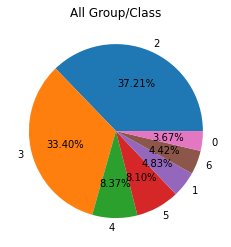

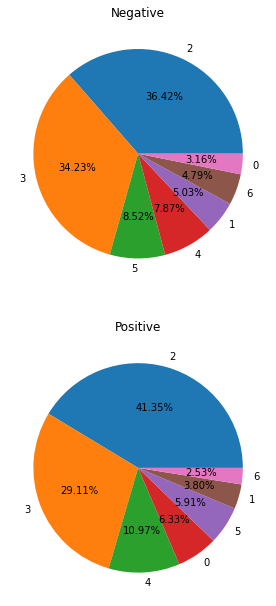

Most:
Negative: 2
Positive: 2


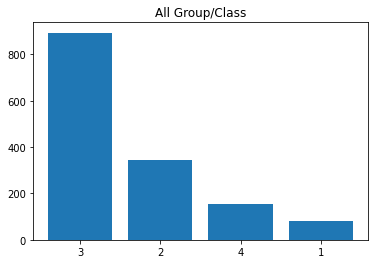

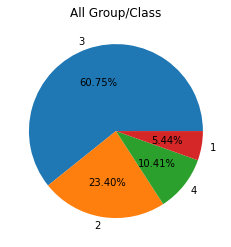

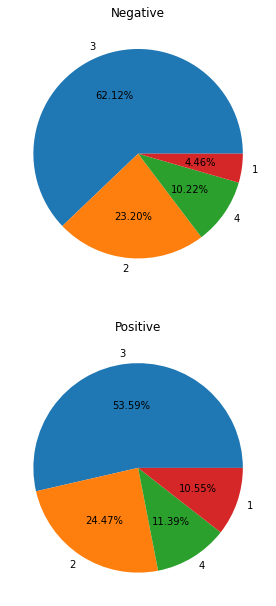

Most:
Negative: 3
Positive: 3


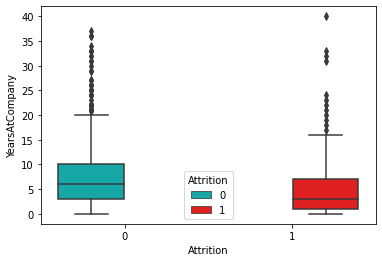

Median:
Negative: 6.0
Positive: 3.0


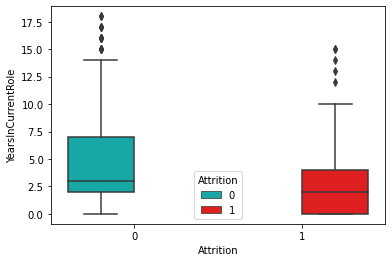

Median:
Negative: 3.0
Positive: 2.0


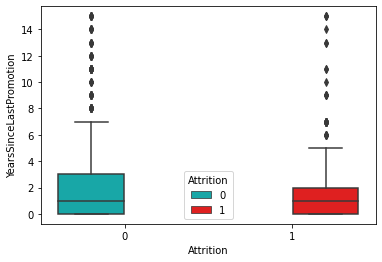

Median:
Negative: 1.0
Positive: 1.0


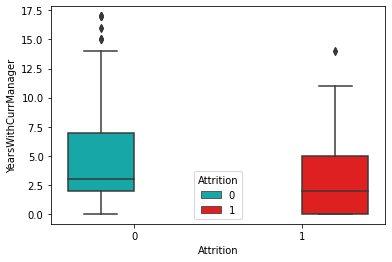

Median:
Negative: 3.0
Positive: 2.0


In [23]:
eda(df_all)

In [24]:
X = df.copy()

y = X[target_column]

X = X.drop([target_column,'Over18',"EmployeeCount","EmployeeNumber","HourlyRate","MonthlyRate","PercentSalaryHike","StandardHours","YearsSinceLastPromotion"], axis=1)
X = pd.get_dummies(X, columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"],drop_first=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(sampling_strategy='minority',random_state=1234)

X_balance, y_balance = ros.fit_resample(X_train, y_train)

print(f'''Shape of X before Balancing: {X.shape}
Shape of X after Balancing: {X_balance.shape}''')

print('\nBalance of positive and negative classes (%):')
y_balance.value_counts(normalize=True) * 100

Shape of X before Balancing: (1470, 40)
Shape of X after Balancing: (1972, 40)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Attrition, dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_balance = sc.fit_transform(X_balance)
X_test = sc.transform(X_test)
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [[CatBoostClassifier(verbose=0),'CatBoost Classifier'],[XGBClassifier(eval_metric='error'),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'], [SVC(),'SVC'],[LGBMClassifier(),'LGBM Classifier'],
              [GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression'],[AdaBoostClassifier(),"AdaBoostClassifier"]]
for cls in classifiers:
    model = cls[0]
    model.fit(X_balance, y_balance)
    
    y_pred = model.predict(X_test)
    print(cls[1])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
    print("Recall : ", recall_score(y_test, y_pred) *  100)
    print("Precision : ", precision_score(y_test, y_pred) *  100)
    print("F1 : ", f1_score(y_test, y_pred) *  100)
    print("ROC AUC : ", roc_auc_score(y_test, y_pred) *  100)
    print("\n")

CatBoost Classifier
Confusion Matrix:
[[237  10]
 [ 26  21]]
Accuracy :  87.75510204081633
Recall :  44.680851063829785
Precision :  67.74193548387096
F1 :  53.84615384615385
ROC AUC :  70.31613403393918


XGB Classifier
Confusion Matrix:
[[238   9]
 [ 26  21]]
Accuracy :  88.09523809523809
Recall :  44.680851063829785
Precision :  70.0
F1 :  54.54545454545453
ROC AUC :  70.51856318373675


Random Forest
Confusion Matrix:
[[244   3]
 [ 34  13]]
Accuracy :  87.41496598639455
Recall :  27.659574468085108
Precision :  81.25
F1 :  41.269841269841265
ROC AUC :  63.22249978464984


K-Nearest Neighbours
Confusion Matrix:
[[191  56]
 [ 20  27]]
Accuracy :  74.14965986394559
Recall :  57.446808510638306
Precision :  32.53012048192771
F1 :  41.53846153846153
ROC AUC :  67.38737186665517


SGD Classifier
Confusion Matrix:
[[184  63]
 [ 20  27]]
Accuracy :  71.7687074829932
Recall :  57.446808510638306
Precision :  30.0
F1 :  39.41605839416058
ROC AUC :  65.97036781807219


SVC
Confusion Matrix:
[

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = [1 if x == True else 0 for x in y_pred]
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Recall : ", recall_score(y_test, y_pred) *  100)
print("Precision : ", precision_score(y_test, y_pred) *  100)
print("F1 : ", f1_score(y_test, y_pred) *  100)
print("ROC AUC : ", roc_auc_score(y_test, y_pred) *  100)

[[201  46]
 [ 16  31]]
Accuracy :  78.91156462585033
Recall :  65.95744680851064
Precision :  40.25974025974026
F1 :  50.0
ROC AUC :  73.66698251356706
